/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.1201
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0793
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0616
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0476
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0490
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0545
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0435
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0429
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0402
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0352
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0365
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0350
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0327
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0312
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0310
Epoch 16/500
2/2 ━━━━

<ipython-input-1-48ae659c82c3>:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


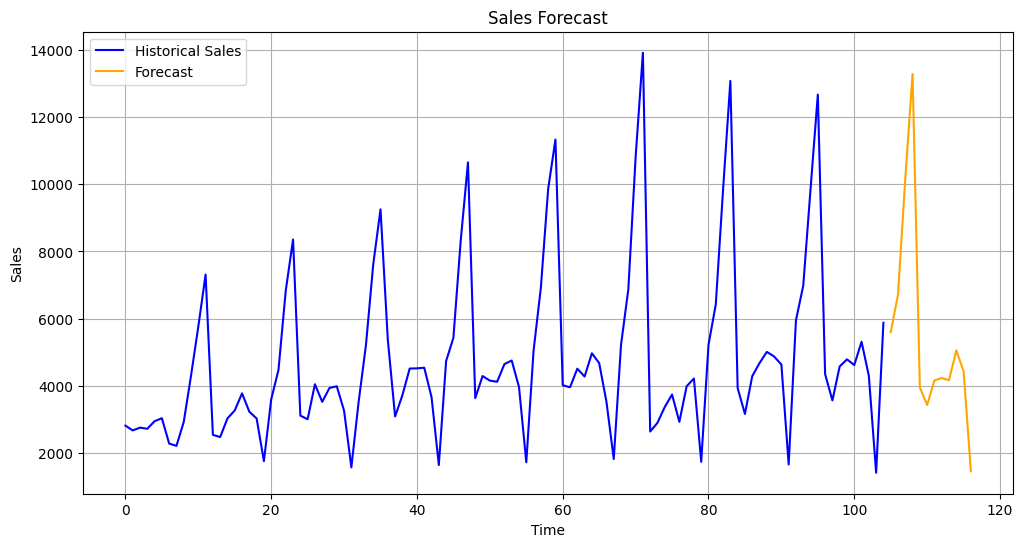

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

# Data preprocessing
def prepare_data(data, sequence_length=12):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[['Sales']]).flatten()

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length])
        y.append(scaled_data[i + sequence_length])

    return np.array(X), np.array(y), scaler

# Model architecture
def create_model(sequence_length):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)),
        Dropout(0.2),
        Conv1D(filters=32, kernel_size=2, activation='relu'),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

# Prediction and plotting
def plot_predictions(train_data, predictions, scaler):
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['Sales'].values, label='Historical Sales', color='blue')

    # Plot predictions
    forecast_index = np.arange(len(train_data), len(train_data) + len(predictions))
    predictions_unscaled = scaler.inverse_transform(predictions.reshape(-1, 1))
    plt.plot(forecast_index, predictions_unscaled, label='Forecast', color='orange')

    plt.title('Sales Forecast')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
sequence_length = 12
train_data = pd.read_csv('monthly-sales-data.csv')
test_data = pd.read_csv('test-sales-data.csv')

# Prepare data
X, y, scaler = prepare_data(train_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Create and train model
model = create_model(sequence_length)
model.fit(X, y, epochs=500, batch_size=64, verbose=1)

# Generate predictions for next 12 months
last_sequence = X[-1:]
predictions = []

for _ in range(12):
    next_pred = model.predict(last_sequence)
    predictions.append(next_pred[0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_pred

predictions = np.array(predictions)

# Plot results with scaler
plot_predictions(train_data, predictions, scaler)


In [2]:
# Predict on the testing sequences
train_predictions = model.predict(X)
# Inverse-transform predictions and true values to the original scale
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
y_unscaled = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate MAPE
mape = np.mean(np.abs((y_unscaled - train_predictions_unscaled) / y_unscaled)) * 100
accuracy = 100 - mape

print("Model Accuracy on Testing Data: {:.2f}%".format(accuracy))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
Model Accuracy on Testing Data: 94.22%
